In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy
from scipy import stats
from statistics import *

In [4]:
# Lendo base de emissões
data_e = pd.read_excel('termicae.xlsx', sheet_name = ['Planilha1', 'Planilha2'])

In [5]:
# Exibindo Planilha 1 da base emissões
data_e['Planilha1']

,Data,Hora Início,Hora Final,Tempo (min),Criticidade,Chaminé,CTE,Origem,Unnamed: 8
0,2017-01-03,09:23:08,09:28:46,5.633333,Alta,2,4,Queima de alcatrão pelo queimador 2A da CTE4. ...,NaN
1,2017-01-12,08:24:02,08:38:00,13.966667,Média,1,2,Variação de pressão de alcatrão durante queima...,NaN
2,2017-01-17,06:13:00,10:00:00,227.000000,Baixa,1,NaN,Grande quantidade de alcatrão queimada devido ...,NaN
3,2017-01-18,06:04:00,08:57:00,173.000000,Baixa,2,4,Acendimento do queimador 4A e em seguida 2A na...,NaN
4,2017-01-19,06:04:00,10:39:00,275.000000,Baixa,NaN,NaN,Queima elevada de alcatrão nas CTE’s. Não há o...,NaN
...,...,...,...,...,...,...,...,...,...
1215,NaT,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
1216,NaT,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
1217,NaT,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
1218,NaT,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [6]:
# Quantidade de nulos por coluna
data_e['Planilha1'].isnull().sum()

Data            966
Hora Início     963
Hora Final      963
Tempo (min)       0
Criticidade     963
Chaminé        1052
CTE            1058
Origem         1077
Unnamed: 8     1219
dtype: int64

In [7]:
# Exibindo Planilha 2 da base emissões
data_e['Planilha2']

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Soma de Tempo (min),Rótulos de Coluna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,(vazio),Total Geral
3,Rótulos de Linha,1,2.000000,1 & 2,(vazio),3.000000,4.000000,1 & 2,3 & 4,(vazio),NaN
4,<03/01/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
5,jan,NaN,13.966667,NaN,227,NaN,178.633333,NaN,NaN,275,694.6
6,fev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.9667,75.9667
7,mar,NaN,NaN,83,NaN,2.916667,NaN,NaN,NaN,NaN,85.9167
8,abr,NaN,NaN,8,NaN,NaN,4.033333,NaN,256,NaN,268.033
9,mai,NaN,49.000000,NaN,NaN,NaN,146.000000,NaN,NaN,NaN,195


In [8]:
# Quantidade de nulos por coluna
data_e['Planilha2'].isnull().sum()

Unnamed: 0      2
Unnamed: 1     15
Unnamed: 2     16
Unnamed: 3     18
Unnamed: 4     20
Unnamed: 5     18
Unnamed: 6     13
Unnamed: 7     21
Unnamed: 8     20
Unnamed: 9     12
Unnamed: 10     3
dtype: int64

In [9]:
# Lendo base de Metadados
data_m = pd.read_excel('Metadados.xlsx', sheet_name = ['Base', 'Dados Obtidos', 'Dados Faltando'])

In [10]:
# Exibindo planilha Base
data_m['Base']

,Unnamed: 0,Unnamed: 1,Função,UM,Unnamed: 4,Unnamed: 5
0,CFO.AC-200.PV,ANALIZ O2 SAÍDA DO ECO#2,Analisadores Saída Economizador,NaN,Saída Caldeira,NaN
1,CFO.AC-200.SV,ANALIZ O2 SAÍDA DO ECO#2,Analisadores Saída Economizador,NaN,Saída Caldeira,X
2,CFO.AC-200-SG1.SV,BIAS ANAL O2 #2,Analisadores Saída Economizador,NaN,Saída Caldeira,X
3,CFO.AI-200.PV,PERCENTUAL O2 GAS SAIDA ECONOM#2,Analisadores Saída Economizador,NaN,Saída Caldeira,NaN
4,CFO.MMN.AI-200.PV,Excesso O2 saída ECO,Analisadores Saída Economizador,NaN,Saída Caldeira,X
...,...,...,...,...,...,...
207,CFO.TI-200-1.PV,TEMP VAPOR SAÍDA CALD#2,NaN,NaN,NaN,X
208,CFO.TI-200-2.PV,TEMP VAPOR SAÍDA CALD#2,NaN,NaN,NaN,NaN
209,CFO.TI-201.PV,TEMP VAPOR SAÍDA DSH#2,NaN,NaN,NaN,NaN
210,CFO.TI-210-1.PV,TEMP VAPOR ENTR SUP II-CALDEIRA2,NaN,NaN,NaN,NaN


In [11]:
# Quantidade de nulos por coluna
data_m['Base'].isnull().sum()

Unnamed: 0     15
Unnamed: 1     16
Função         62
UM            181
Unnamed: 4     84
Unnamed: 5     87
dtype: int64

In [12]:
# Exibindo planilha Dados Obtidos
data_m['Dados Obtidos']

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CFO.AC-200.SV,ANALIZ O2 SAÍDA DO ECO#2,Analisadores Saída Economizador,%,Saída Caldeira,NaN,X,NaN
2,CFO.AC-200-SG1.SV,BIAS ANAL O2 #2,Analisadores Saída Economizador,%,Saída Caldeira,NaN,X,NaN
3,CFO.MMN.AI-200.PV,Excesso O2 saída ECO,Analisadores Saída Economizador,NaN,Saída Caldeira,NaN,X,NaN
4,CFO.AI-213.PV,CONCENTRAÇÃO CO GAS SAIDA ECO#2,Analisadores Saída Economizador,mg/Nm³,Saída Caldeira,NaN,X,NaN
...,...,...,...,...,...,...,...,...
133,CFO.PIC-200.PV,PRESSAO VAPOR SAIDA CALD2 - PV,NaN,Kgf/cm²,Saída Caldeira,NaN,X,NaN
134,CFO.PC-232.PV,PRESSÃO COLETOR BAIXA #12,NaN,Kgf/cm²,NaN,NaN,X,NaN
135,CFO.TC-200.MV,TEMP VAPOR SAIDA CALD2 - MV,NaN,°C,NaN,NaN,X,NaN
136,CFO.TI-200.PV,TEMP VAP SAIDA CALDEIRA#2,NaN,°C,NaN,NaN,X,NaN


In [13]:
# Quantidade de nulos por coluna
data_m['Dados Obtidos'].isnull().sum()

Unnamed: 0     12
Unnamed: 1     13
Unnamed: 2     47
Unnamed: 3     42
Unnamed: 4     52
Unnamed: 5    138
Unnamed: 6     13
Unnamed: 7    127
dtype: int64

In [14]:
# Exibindo planilha Dados Faltando
data_m['Dados Faltando']

,CFO.AC-200.PV,ANALIZ O2 SAÍDA DO ECO#2,Analisadores Saída Economizador,Unnamed: 3,Saída Caldeira
0,CFO.AI-200.PV,PERCENTUAL O2 GAS SAIDA ECONOM#2,Analisadores Saída Economizador,NaN,Saída Caldeira
1,CFO.AI-114-2.PV,Particulado CTE12 s/ compens O2,Analisadores Chaminé,NaN,Saída Caldeira
2,CFO.AI-114A-2.RV,Partic CTE12 sem fator correção,Analisadores Chaminé,NaN,Saída Caldeira
3,CFO.AI-114-22.P01,Fator Particulado c/ TAR #12,Analisadores Chaminé,NaN,Saída Caldeira
4,CFO.AI-114-22.P02,Fator Particulado c/ GAS #12,Analisadores Chaminé,NaN,Saída Caldeira
...,...,...,...,...,...
72,CFO.PIC-200.SV,PRESSAO VAPOR SAIDA CALD2 - SV,Kgf/cm²,Saída,NaN
73,CFO.TI-200-2.PV,TEMP VAPOR SAÍDA CALD#2,NaN,NaN,NaN
74,CFO.TI-201.PV,TEMP VAPOR SAÍDA DSH#2,NaN,NaN,NaN
75,CFO.TI-210-1.PV,TEMP VAPOR ENTR SUP II-CALDEIRA2,NaN,NaN,NaN


In [15]:
# Quantidade de nulos por coluna
data_m['Dados Faltando'].isnull().sum()

CFO.AC-200.PV                       8
ANALIZ O2 SAÍDA DO ECO#2            8
Analisadores Saída Economizador    19
Unnamed: 3                         67
Saída Caldeira                     38
dtype: int64

In [16]:
# Lendo dados de medição sensor CFO.AI-112-2MA.PV
data_med = pd.read_csv("Clean-CFO.AI-112-2MA.PV.txt", sep=";")

In [17]:
# Exibindo dados de medição sensor CFO.AI-112-2MA.PV
data_med

,ts,value
0,01-JAN-20 00:00:00.0,206.642
1,01-JAN-20 00:00:30.0,207.191
2,01-JAN-20 00:01:00.0,204.570
3,01-JAN-20 00:01:30.0,201.490
4,01-JAN-20 00:02:00.0,202.821
...,...,...
604795,28-JUL-20 23:57:30.0,252.926
604796,28-JUL-20 23:58:00.0,254.660
604797,28-JUL-20 23:58:30.0,255.249
604798,28-JUL-20 23:59:00.0,255.062


In [18]:
# data_m_base terá apenas a planilha Base do arquivo de Metadados
data_m_base = pd.read_excel('Metadados.xlsx', sheet_name = 'Base')

In [19]:
# Selecionando a linha que contém as infos do sensor escolhido CFO.AI-112-2MA.PV
l_sensor = data_m_base[data_m_base.iloc[:,0] == 'CFO.AI-112-2MA.PV']

In [20]:
# Criando uma coluna chave
l_sensor.loc[:,'key']=1
data_med.loc[:,'key']=1

/home/logcomex/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/logcomex/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [21]:
l_sensor

,Unnamed: 0,Unnamed: 1,Função,UM,Unnamed: 4,Unnamed: 5,key
14,CFO.AI-112-2MA.PV,CONCENTRAÇÃO SOX MA,Analisadores Chaminé,NaN,Saída Caldeira,NaN,1.0


In [22]:
data_med

,ts,value,key
0,01-JAN-20 00:00:00.0,206.642,1
1,01-JAN-20 00:00:30.0,207.191,1
2,01-JAN-20 00:01:00.0,204.570,1
3,01-JAN-20 00:01:30.0,201.490,1
4,01-JAN-20 00:02:00.0,202.821,1
...,...,...,...
604795,28-JUL-20 23:57:30.0,252.926,1
604796,28-JUL-20 23:58:00.0,254.660,1
604797,28-JUL-20 23:58:30.0,255.249,1
604798,28-JUL-20 23:59:00.0,255.062,1


In [23]:
# Juntando os data-frames usando a coluna chave
data_med.set_index('key').join(l_sensor.set_index('key'))

,ts,value,Unnamed: 0,Unnamed: 1,Função,UM,Unnamed: 4,Unnamed: 5
key,,,,,,,,
1,01-JAN-20 00:00:00.0,206.642,CFO.AI-112-2MA.PV,CONCENTRAÇÃO SOX MA,Analisadores Chaminé,NaN,Saída Caldeira,NaN
1,01-JAN-20 00:00:30.0,207.191,CFO.AI-112-2MA.PV,CONCENTRAÇÃO SOX MA,Analisadores Chaminé,NaN,Saída Caldeira,NaN
1,01-JAN-20 00:01:00.0,204.570,CFO.AI-112-2MA.PV,CONCENTRAÇÃO SOX MA,Analisadores Chaminé,NaN,Saída Caldeira,NaN
1,01-JAN-20 00:01:30.0,201.490,CFO.AI-112-2MA.PV,CONCENTRAÇÃO SOX MA,Analisadores Chaminé,NaN,Saída Caldeira,NaN
1,01-JAN-20 00:02:00.0,202.821,CFO.AI-112-2MA.PV,CONCENTRAÇÃO SOX MA,Analisadores Chaminé,NaN,Saída Caldeira,NaN
...,...,...,...,...,...,...,...,...
1,28-JUL-20 23:57:30.0,252.926,CFO.AI-112-2MA.PV,CONCENTRAÇÃO SOX MA,Analisadores Chaminé,NaN,Saída Caldeira,NaN
1,28-JUL-20 23:58:00.0,254.660,CFO.AI-112-2MA.PV,CONCENTRAÇÃO SOX MA,Analisadores Chaminé,NaN,Saída Caldeira,NaN
1,28-JUL-20 23:58:30.0,255.249,CFO.AI-112-2MA.PV,CONCENTRAÇÃO SOX MA,Analisadores Chaminé,NaN,Saída Caldeira,NaN


Colunas com células em branco:
* Aquivo Emissões:
    * Planilha 1:
        * Data
        * Hora Início
        * Hora Final
        * Criticidade
        * Chaminé
        * CTE
        * Origem
        * Unnamed: 8
    * Planilha 2:
        * Unnamed: 0
        * Unnamed: 1
        * Unnamed: 2
        * Unnamed: 3
        * Unnamed: 4
        * Unnamed: 5
        * Unnamed: 6
        * Unnamed: 7
        * Unnamed: 8
        * Unnamed: 9
        * Unnamed: 10
* Arquivo Metadados:
    * Planilha Base:
        * Unnamed: 0
        * Unnamed: 1
        * Função
        * UM
        * Unnamed: 4
        * Unnamed: 5
    * Planilha Dados Obtidos:
        * Unnamed: 0
        * Unnamed: 1
        * Unnamed: 2
        * Unnamed: 3
        * Unnamed: 4
        * Unnamed: 5
        * Unnamed: 6
        * Unnamed: 7
    * Planilha Dados Faltando:
        * CFO.AC-200.PV
        * ANALIZ O2 SAÍDA DO ECO#2
        * Analisadores Saída Economizador
        * Unnamed: 3
        * Saída Caldeira 
        

Para o arquivo Emissões nenhuma das 3 estratégias a seguir se aplica: eliminar as linhas com valor nulo no referido campo, eliminar a coluna inteira, substituir o valor nulo por outro valor. Isso porque há uma grande quantidade de dados nulos em diversas das colunas, não tornando viável a limpeza desta base pois não restará muito banco de dados após uma exclusão de nulos.

Já para o arquivo Metadados algumas colunas podem ser excluídas, pois devido à grande quantidade de nulos não agregam muita informação, são elas: 
* Planilha Base:
    * UM
* Planilha Dados Obtidos:
    * Unnamed: 5
    * Unnamed: 7
* Planilha Dados Faltando:
    * Unnamed: 3


O código abaixo implementa essa mudança:

In [24]:
data_m['Base'] = data_m['Base'].drop(columns=['UM'])
# Exibindo base de dados note que não tem a coluna UM
data_m['Base']

,Unnamed: 0,Unnamed: 1,Função,Unnamed: 4,Unnamed: 5
0,CFO.AC-200.PV,ANALIZ O2 SAÍDA DO ECO#2,Analisadores Saída Economizador,Saída Caldeira,NaN
1,CFO.AC-200.SV,ANALIZ O2 SAÍDA DO ECO#2,Analisadores Saída Economizador,Saída Caldeira,X
2,CFO.AC-200-SG1.SV,BIAS ANAL O2 #2,Analisadores Saída Economizador,Saída Caldeira,X
3,CFO.AI-200.PV,PERCENTUAL O2 GAS SAIDA ECONOM#2,Analisadores Saída Economizador,Saída Caldeira,NaN
4,CFO.MMN.AI-200.PV,Excesso O2 saída ECO,Analisadores Saída Economizador,Saída Caldeira,X
...,...,...,...,...,...
207,CFO.TI-200-1.PV,TEMP VAPOR SAÍDA CALD#2,NaN,NaN,X
208,CFO.TI-200-2.PV,TEMP VAPOR SAÍDA CALD#2,NaN,NaN,NaN
209,CFO.TI-201.PV,TEMP VAPOR SAÍDA DSH#2,NaN,NaN,NaN
210,CFO.TI-210-1.PV,TEMP VAPOR ENTR SUP II-CALDEIRA2,NaN,NaN,NaN


In [25]:
data_m['Dados Obtidos'] = data_m['Dados Obtidos'].drop(columns=['Unnamed: 5', 'Unnamed: 7'])
# Exibindo base de dados note que não tem as colunas Unnamed: 5 e Unnamed: 7
data_m['Dados Obtidos']

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN
1,CFO.AC-200.SV,ANALIZ O2 SAÍDA DO ECO#2,Analisadores Saída Economizador,%,Saída Caldeira,X
2,CFO.AC-200-SG1.SV,BIAS ANAL O2 #2,Analisadores Saída Economizador,%,Saída Caldeira,X
3,CFO.MMN.AI-200.PV,Excesso O2 saída ECO,Analisadores Saída Economizador,NaN,Saída Caldeira,X
4,CFO.AI-213.PV,CONCENTRAÇÃO CO GAS SAIDA ECO#2,Analisadores Saída Economizador,mg/Nm³,Saída Caldeira,X
...,...,...,...,...,...,...
133,CFO.PIC-200.PV,PRESSAO VAPOR SAIDA CALD2 - PV,NaN,Kgf/cm²,Saída Caldeira,X
134,CFO.PC-232.PV,PRESSÃO COLETOR BAIXA #12,NaN,Kgf/cm²,NaN,X
135,CFO.TC-200.MV,TEMP VAPOR SAIDA CALD2 - MV,NaN,°C,NaN,X
136,CFO.TI-200.PV,TEMP VAP SAIDA CALDEIRA#2,NaN,°C,NaN,X


In [26]:
data_m['Dados Faltando'] = data_m['Dados Faltando'].drop(columns=['Unnamed: 3'])
# Exibindo base de dados note que não tem a coluna Unnamed: 3
data_m['Dados Faltando']

,CFO.AC-200.PV,ANALIZ O2 SAÍDA DO ECO#2,Analisadores Saída Economizador,Saída Caldeira
0,CFO.AI-200.PV,PERCENTUAL O2 GAS SAIDA ECONOM#2,Analisadores Saída Economizador,Saída Caldeira
1,CFO.AI-114-2.PV,Particulado CTE12 s/ compens O2,Analisadores Chaminé,Saída Caldeira
2,CFO.AI-114A-2.RV,Partic CTE12 sem fator correção,Analisadores Chaminé,Saída Caldeira
3,CFO.AI-114-22.P01,Fator Particulado c/ TAR #12,Analisadores Chaminé,Saída Caldeira
4,CFO.AI-114-22.P02,Fator Particulado c/ GAS #12,Analisadores Chaminé,Saída Caldeira
...,...,...,...,...
72,CFO.PIC-200.SV,PRESSAO VAPOR SAIDA CALD2 - SV,Kgf/cm²,NaN
73,CFO.TI-200-2.PV,TEMP VAPOR SAÍDA CALD#2,NaN,NaN
74,CFO.TI-201.PV,TEMP VAPOR SAÍDA DSH#2,NaN,NaN
75,CFO.TI-210-1.PV,TEMP VAPOR ENTR SUP II-CALDEIRA2,NaN,NaN


In [27]:
data1 = pd.read_csv('sensors.csv', sep = ';', index_col='ts', parse_dates=True)
data1.head()

,CFO.PIC-200.SV,CFO.FT-202.PV,CFO.PCD-205-A.MV,CFO.PCD-206-A.MV,CFO.PDIC-203.PV,CFO.SSV-201-FE.PV,CFO.PDIC-202.PV,CFO.FIC-208.SV,CFO.PC-206.PV,CFO.PC-206.SV,...,CFO.HC-202-2-D.MV,CFO.TI-211-10B.PV,CFO.FI-203B.PV,CFO.2SWE337B05.PV,CFO.QALC2_3A,CFO.QALC2_2B,CFO.2SWE236B05.PV,CFO.2SWE237B05.PV,CFO.FIX-202.CPV1,CFO.2SWE335B05.PV
ts,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,86.9193,143.851,61.6005,38.9428,99.4576,0.0,145.976,212.840,159.794,160.0,...,80.0,155.533,1.89255,0.0,0.0,0.0,0.0,0.0,168.714,0.0
2020-01-01 00:00:30,86.9193,143.413,59.7678,38.6616,98.2541,0.0,148.990,213.824,162.077,160.0,...,80.0,155.527,1.89258,0.0,0.0,0.0,0.0,0.0,170.948,0.0
2020-01-01 00:01:00,86.9193,142.975,59.9186,38.4631,97.1221,0.0,150.040,221.221,162.114,160.0,...,80.0,155.521,1.89261,0.0,0.0,0.0,0.0,0.0,171.380,0.0
2020-01-01 00:01:30,86.9193,142.536,59.9674,39.1056,102.4250,0.0,147.841,225.856,156.684,160.0,...,80.0,155.515,1.89263,0.0,0.0,0.0,0.0,0.0,171.110,0.0
2020-01-01 00:02:00,86.9193,143.627,60.8294,38.3893,102.2120,0.0,139.994,223.386,161.698,160.0,...,80.0,155.509,1.89266,0.0,0.0,0.0,0.0,0.0,164.640,0.0


In [28]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604800 entries, 2020-01-01 00:00:00 to 2020-07-28 23:59:30
Data columns (total 51 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CFO.PIC-200.SV      604800 non-null  float64
 1   CFO.FT-202.PV       604800 non-null  float64
 2   CFO.PCD-205-A.MV    604800 non-null  float64
 3   CFO.PCD-206-A.MV    604800 non-null  float64
 4   CFO.PDIC-203.PV     604800 non-null  float64
 5   CFO.SSV-201-FE.PV   604800 non-null  float64
 6   CFO.PDIC-202.PV     604800 non-null  float64
 7   CFO.FIC-208.SV      604800 non-null  float64
 8   CFO.PC-206.PV       604800 non-null  float64
 9   CFO.PC-206.SV       604800 non-null  float64
 10  CFO.PI-220.PV       604800 non-null  float64
 11  CFO.AI-114-2.PV     604800 non-null  float64
 12  CFO.PC-205.PV       604800 non-null  float64
 13  CFO.FT-203.PV       604800 non-null  float64
 14  CFO.PIC-200.MV      604800 non-null  float64
 15  

In [29]:
# Intervalo correspondente aos registros de emissão visivel
data1_ev = data1['2020-03-05 14:26:15':'2020-03-05 14:48:23']
data1_ev

,CFO.PIC-200.SV,CFO.FT-202.PV,CFO.PCD-205-A.MV,CFO.PCD-206-A.MV,CFO.PDIC-203.PV,CFO.SSV-201-FE.PV,CFO.PDIC-202.PV,CFO.FIC-208.SV,CFO.PC-206.PV,CFO.PC-206.SV,...,CFO.HC-202-2-D.MV,CFO.TI-211-10B.PV,CFO.FI-203B.PV,CFO.2SWE337B05.PV,CFO.QALC2_3A,CFO.QALC2_2B,CFO.2SWE236B05.PV,CFO.2SWE237B05.PV,CFO.FIX-202.CPV1,CFO.2SWE335B05.PV
ts,,,,,,,,,,,,,,,,,,,,,
2020-03-05 14:26:30,87.3571,163.278,57.1603,36.6663,503.355,0.0,170.8190,202.966,148.932,150.0,...,75.0,151.937,1.99742,0.0,0.0,0.0,0.0,0.0,184.282,0.0
2020-03-05 14:27:00,87.3596,186.006,67.4219,35.8413,504.158,0.0,187.3210,219.789,147.753,150.0,...,75.0,152.417,1.96989,0.0,0.0,0.0,0.0,0.0,194.473,0.0
2020-03-05 14:27:30,87.3621,176.997,66.0433,37.3521,507.357,0.0,109.8480,221.808,144.375,150.0,...,75.0,152.897,1.98483,0.0,0.0,0.0,0.0,0.0,144.893,0.0
2020-03-05 14:28:00,87.3646,167.711,65.7176,37.9041,499.585,0.0,89.4741,231.070,144.877,150.0,...,75.0,153.376,1.98716,0.0,0.0,0.0,0.0,0.0,177.920,0.0
2020-03-05 14:28:30,87.3671,165.938,66.1739,38.2225,500.538,0.0,81.2810,225.370,145.379,150.0,...,75.0,153.856,1.98948,0.0,0.0,0.0,0.0,0.0,167.573,0.0
2020-03-05 14:29:00,87.3696,170.716,68.2490,38.5410,498.507,0.0,87.5320,214.375,145.882,150.0,...,75.0,154.336,1.99181,0.0,0.0,0.0,0.0,0.0,175.266,0.0
2020-03-05 14:29:30,87.3721,172.554,68.0368,39.2600,505.779,0.0,91.5164,209.052,146.384,150.0,...,75.0,154.758,1.99413,0.0,0.0,0.0,0.0,0.0,180.147,0.0
2020-03-05 14:30:00,87.3746,175.822,70.0590,38.5567,500.928,0.0,95.3347,217.913,146.886,150.0,...,75.0,155.175,1.99646,0.0,0.0,0.0,0.0,0.0,183.364,0.0
2020-03-05 14:30:30,87.3771,176.346,69.8416,38.9746,509.397,0.0,98.8543,225.753,147.388,150.0,...,75.0,155.591,1.99878,0.0,0.0,0.0,0.0,0.0,188.213,0.0


In [30]:
# Intervalo correspondente aos registros de emissão não visivel
data1_ei = data1['2020-07-23 08:33:00':'2020-07-23 08:52:30']
data1_ei

,CFO.PIC-200.SV,CFO.FT-202.PV,CFO.PCD-205-A.MV,CFO.PCD-206-A.MV,CFO.PDIC-203.PV,CFO.SSV-201-FE.PV,CFO.PDIC-202.PV,CFO.FIC-208.SV,CFO.PC-206.PV,CFO.PC-206.SV,...,CFO.HC-202-2-D.MV,CFO.TI-211-10B.PV,CFO.FI-203B.PV,CFO.2SWE337B05.PV,CFO.QALC2_3A,CFO.QALC2_2B,CFO.2SWE236B05.PV,CFO.2SWE237B05.PV,CFO.FIX-202.CPV1,CFO.2SWE335B05.PV
ts,,,,,,,,,,,,,,,,,,,,,
2020-07-23 08:33:00,40.0,0.0,100.0,100.0,4.53208,0.0,-1.067890,0.0,-1.56968,100.0,...,80.0,23.5746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-23 08:33:30,40.0,0.0,100.0,100.0,3.88504,0.0,-1.001950,0.0,-1.57810,100.0,...,80.0,23.5764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-23 08:34:00,40.0,0.0,100.0,100.0,4.64663,0.0,-1.115640,0.0,-1.58652,100.0,...,80.0,23.5783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-23 08:34:30,40.0,0.0,100.0,100.0,4.32303,0.0,-1.163150,0.0,-1.59495,100.0,...,80.0,23.5801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-23 08:35:00,40.0,0.0,100.0,100.0,4.20047,0.0,-1.332920,0.0,-1.60337,100.0,...,80.0,23.5819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-23 08:35:30,40.0,0.0,100.0,100.0,4.70426,0.0,-1.315210,0.0,-1.61179,100.0,...,80.0,23.5838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-23 08:36:00,40.0,0.0,100.0,100.0,4.55209,0.0,-1.130910,0.0,-1.62022,100.0,...,80.0,23.5856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-23 08:36:30,40.0,0.0,100.0,100.0,3.96888,0.0,-1.268330,0.0,-1.62864,100.0,...,80.0,23.5874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-23 08:37:00,40.0,0.0,100.0,100.0,4.28333,0.0,-1.166860,0.0,-1.63706,100.0,...,80.0,23.5893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Maior e menor média dentre os registros de emissão visivel e diferença entre elas
summary = data1_ev.describe()
medias = summary.iloc[1,:] # deixando apenas a linha de média e o sensor como index
print('A maior média é:', max(medias), 'Registrada pelo sensor:', medias.idxmax())
print('A menor média é:', min(medias), 'Registrada pelo sensor:', medias.idxmin())
print('A maior diferença entre médias é:', max(medias)-min(medias), '- entre os sensores', medias.idxmax(),'e', medias.idxmin())

A maior média é: 505.8136136363637 Registrada pelo sensor: CFO.PDIC-203.PV
A menor média é: -35.0 Registrada pelo sensor: CFO.FRSET-206.SV
A maior diferença entre médias é: 540.8136136363637 - entre os sensores CFO.PDIC-203.PV e CFO.FRSET-206.SV


In [32]:
# Maior e menor média dentre os registros de emissão não visivel e diferença entre elas
summary = data1_ei.describe()
medias1 = summary.iloc[1,:] # deixando apenas a linha de média e o sensor como index
print('A maior média é:', max(medias1), 'Registrada pelo sensor:', medias1.idxmax())
print('A menor média é:', min(medias), 'Registrada pelo sensor:', medias1.idxmin())
print('A maior diferença entre médias é:', max(medias1)-min(medias1), '- entre os sensores', medias1.idxmax(),'e', medias1.idxmin())

A maior média é: 526.56025 Registrada pelo sensor: CFO.AI-112-2MA.PV
A menor média é: -35.0 Registrada pelo sensor: CFO.FRSET-206.SV
A maior diferença entre médias é: 556.56025 - entre os sensores CFO.AI-112-2MA.PV e CFO.FRSET-206.SV


<AxesSubplot:title={'center':'Histograma das médias dos sensores'}, ylabel='Frequency'>

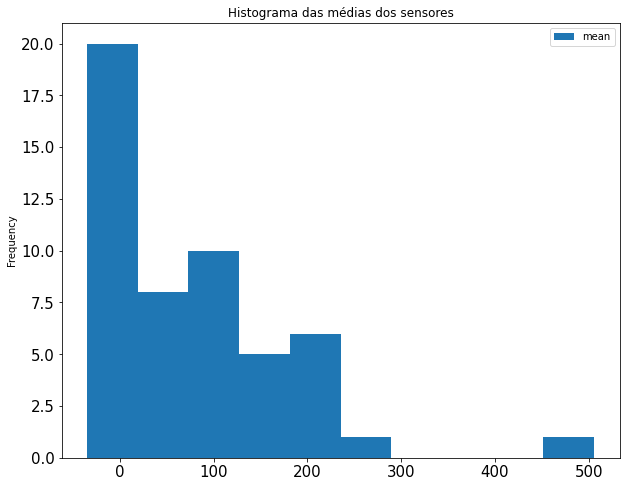

In [38]:
# Exploração Gráficos
#print(medias)
medias.plot(kind='hist', title='Histograma das médias dos sensores', figsize=(10,8), legend=True, fontsize=15)
